In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
filename='/content/drive/MyDrive/Coding Dojo/Week 8/processed.cleveland.data'
df=pd.read_csv(filename,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# EDA and Data Visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
# For target (Heart Disease), 0 is absence, 1,2,3,4 = present
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [9]:
#`simplify target variable to no disease 0 and disease 1
df['num']=[0 if num == 0 else 1 for num in df['num']]

In [10]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

# Continuous Variables

In [11]:
continuous_feature=['age','trestbps','chol','thalach','oldpeak']

In [12]:
df[continuous_feature].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


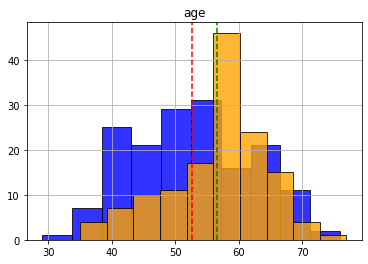

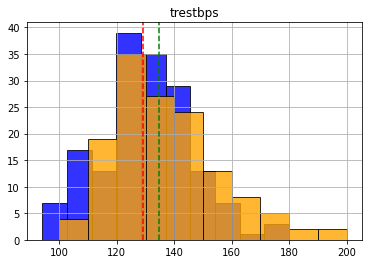

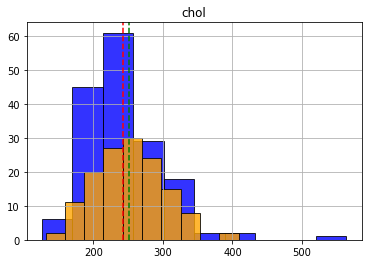

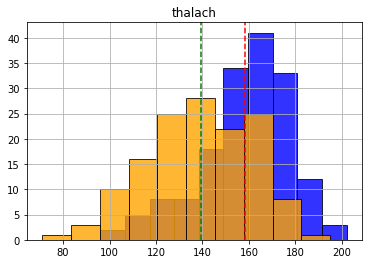

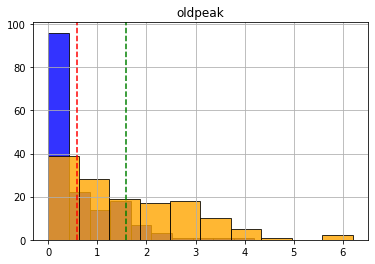

In [13]:
# Show distribution of continuous variables
for feature in continuous_feature:
  df[df['num']==0][feature].hist(alpha=0.8,color='blue',edgecolor='k')
  plt.axvline(df[df['num']==0][feature].mean(),color='r',linestyle='dashed')
  df[df['num']==1][feature].hist(alpha=0.8,color='orange',edgecolor='k')
  plt.axvline(df[df['num']==1][feature].mean(),color='green',linestyle='dashed')
  plt.title(feature)
  plt.show()

As shown on the graphs, the average age in disease group is higher and most of the cases occur in 55-65 age group. The average resting bp is higher in disease group. The average max heart rate achieved is lower in disease group compared with no disease group. In disease group, ST depression induced by exercise is larger.

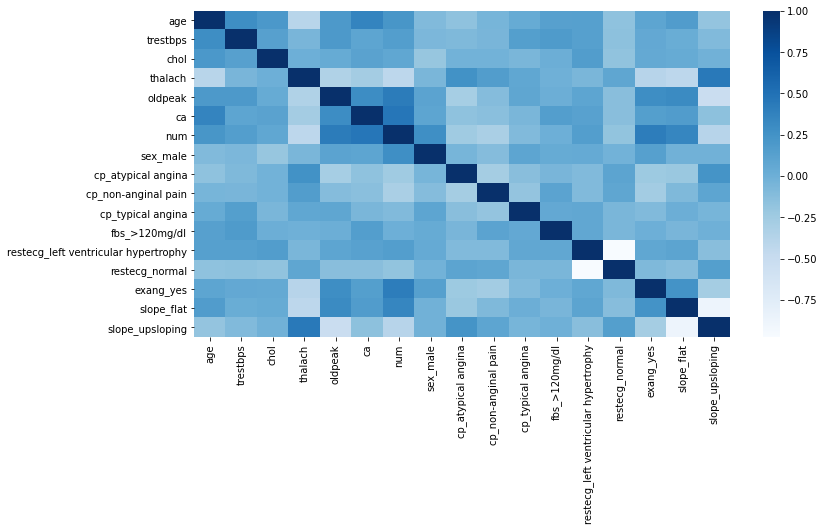

In [93]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Blues');

The heatmap shows heart disease is highly associated with exercise induced angina, ST depression induced by exercise and chest pain.


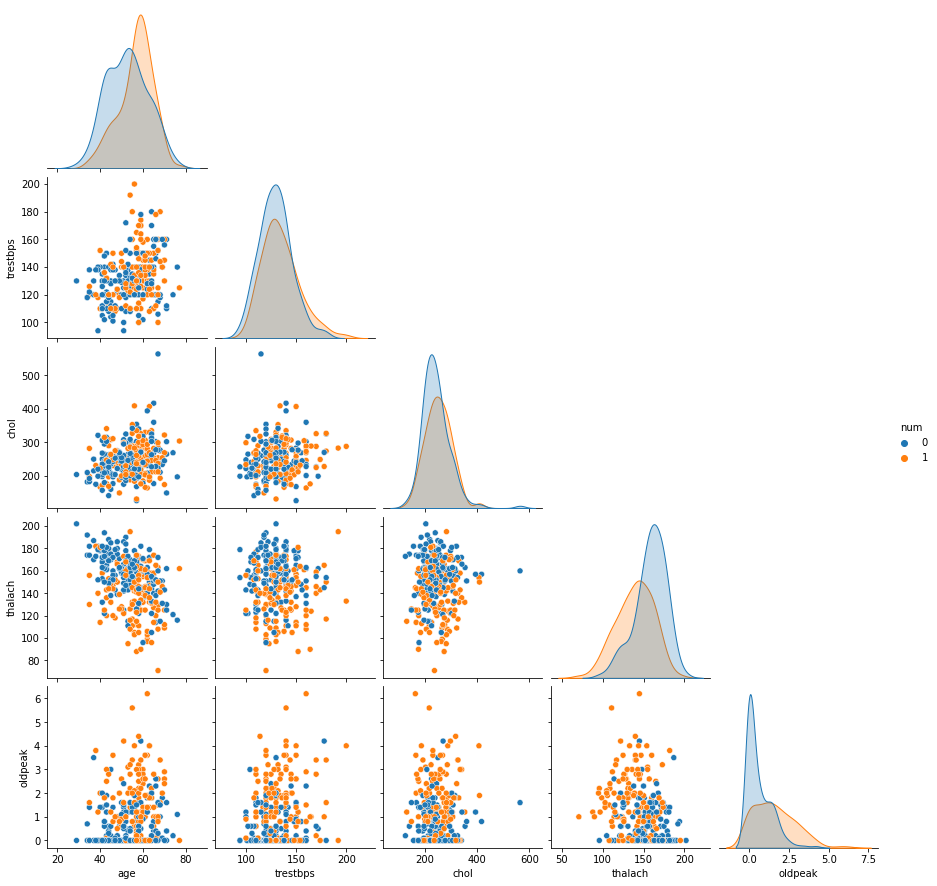

In [15]:
sns.pairplot(data=df[continuous_feature+['num']],hue='num',corner=True)

# Categorical Variables

In [16]:
categorical_feature=['sex','cp','fbs','restecg','exang','slope','ca' ,'thal']
for feature in categorical_feature:
  print(df[feature].value_counts())

1.0    206
0.0     97
Name: sex, dtype: int64
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
0.0    258
1.0     45
Name: fbs, dtype: int64
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
0.0    204
1.0     99
Name: exang, dtype: int64
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


In [17]:
# drop the rows with ?
df.drop(df[(df['ca']=='?') | (df['thal']=='?')].index, inplace=True)

In [18]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


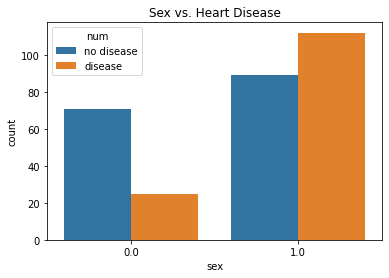

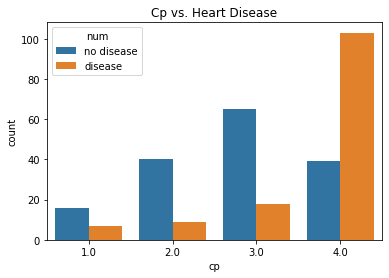

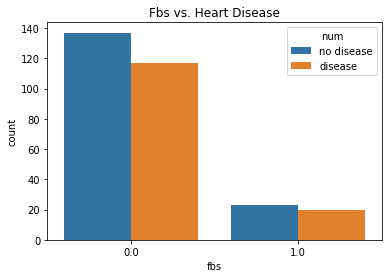

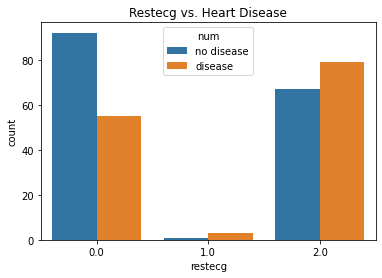

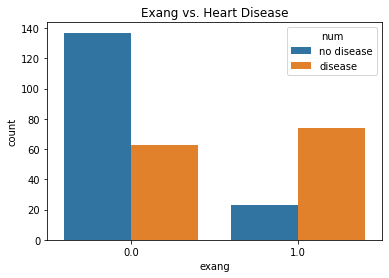

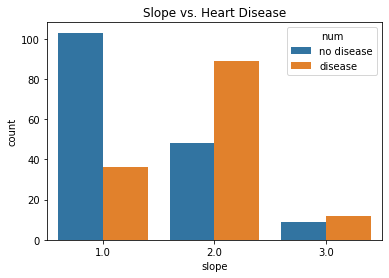

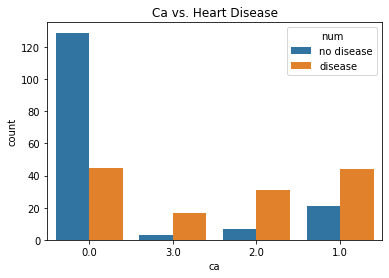

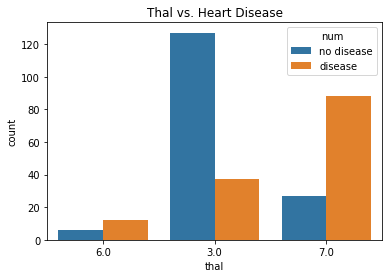

In [19]:
categorical_feature=['sex','cp','fbs','restecg','exang','slope','ca','thal']
df1=df.copy()
df1['num']=df1['num'].apply(lambda x: 'no disease' if x==0 else 'disease')
for feature in categorical_feature:
  sns.countplot(data=df1,x=feature,hue='num')
  plt.title(feature.capitalize()+' vs. Heart Disease')
  plt.show()


*   Sex: 0 being female and 1 being male. Heart disease occur more in males.
*   For chest pain (1: typical angina, 2: atypical angina, 3: non-anginal pain 4: asymptomatic), most of heart disease cases occur in asymptomatic group.
*   For rectecg, the group with abnormality with ST-T or left ventricular hypertrophy has more heart disease cases.
*   For exercise induced angina, if yes, the person will be more likely to have heart disease.
*   For slope, there are more heart disease cases in the group with flat ST segment
*   For thal (3=normal, 6=fixed defect, 7=reversable defect), there are more heart disease cases in the reversable defect group.










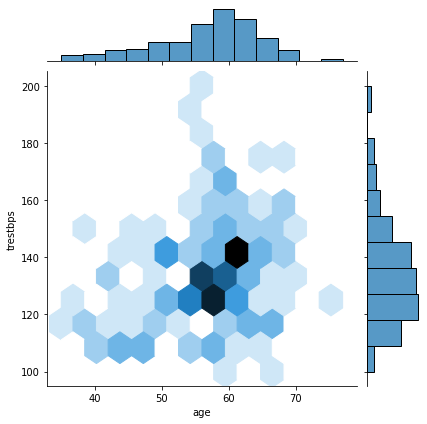

In [20]:
# scatter plot showing heart disease more likely occur in 50-60 age group with BP greater than 120
sns.jointplot(data=df[df['num']==1], x='age', y='trestbps',kind='hex')

In [21]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [22]:
# The categorical variables were simply converted to numbers
# Need to handle it in a more appropriate way by changing them back to strings and then do one hot encoding

df['sex']=df['sex'].map({0:'female',1:'male'})
df['cp']=df['cp'].map({1:'typical angina',2:'atypical angina',3:'non-anginal pain',4:'asymptomatic'})
df['fbs']=df['fbs'].map({1:'>120mg/dl',0:'<=120mg/dl'})
df['restecg']=df['restecg'].map({0:'normal',1:'ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['exang']=df['exang'].map({1:'yes',0:'no'})
df['slope']=df['slope'].map({1:'upsloping',2:'flat',3:'downsloping'})

# Datatype of Ca, number of number of major vessels (0-3) colored by flourosopy, was 'object', change to int
df['ca']=df['ca'].apply(lambda x: int(x[0]))
df['thal']=df['thal'].map({'3':'normal','6':'fixed defect','7':'reversable defect'})


# One Hot Encoding

In [23]:
df=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'],drop_first=True)

In [24]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_>120mg/dl,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping
0,63.0,145.0,233.0,150.0,2.3,0,0,1,0,0,1,1,1,0,0,0,0
1,67.0,160.0,286.0,108.0,1.5,3,1,1,0,0,0,0,1,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,2,1,1,0,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,1,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,0,1,0,0,0,1,0,0,0,1


In [25]:
X=df.drop(columns='num')
y=df['num']

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=3)

# KNN model

In [27]:
for i in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']:
  X_train_sc=X_train.copy()
  X_test_sc=X_test.copy()
  scaler=StandardScaler()
  scaler.fit(X_train[[i]])
  X_train_sc[i]=scaler.transform(X_train_sc[[i]])
  X_test_sc[i]=scaler.transform(X_test_sc[[i]])

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,y_train)
print('Train Score: ', knn.score(X_train_sc,y_train))
print('Test Score: ', knn.score(X_test_sc,y_test))

Train Score:  0.7882882882882883
Test Score:  0.68


# Random Forest

In [39]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('Train Score: ', rf.score(X_train,y_train))
print('Test Score: ', rf.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.84


In [30]:
grid_rf={'n_estimators':np.arange(10,150,10),
         'max_features':['auto','sqrt','log2'],
         'max_depth':[2,4,6],
         'min_samples_split':[2,5,7,9],
         'min_samples_leaf':[1,2,4,6]}

rf_gridcv=GridSearchCV(rf,grid_rf,cv=5)
rf_gridcv.fit(X_train,y_train)
print('Hyperparameters:', rf_gridcv.best_params_)
print('Train Score:', rf_gridcv.score(X_train,y_train))
print('Test Score:', rf_gridcv.score(X_test,y_test))

Hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 20}
Train Score: 0.9279279279279279
Test Score: 0.84


# Logistic Regression

In [31]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_sc,y_train)
print('Train Score: ', logreg.score(X_train_sc,y_train))
print('Test Score: ', logreg.score(X_test_sc,y_test))

Train Score:  0.8423423423423423
Test Score:  0.84


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('Train Score: ', xgb.score(X_train,y_train))
print('Test Score: ', xgb.score(X_test,y_test))

Train Score:  0.972972972972973
Test Score:  0.84


In [33]:
params={'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2),
        'gamma':[i/10.0 for i in range(0,5)]
}

gs=GridSearchCV(XGBClassifier(),params,n_jobs=4,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
  

In [34]:
print('Train Score: ', gs.score(X_train,y_train))
print('Test Score: ', gs.score(X_test,y_test))

Train Score:  0.963963963963964
Test Score:  0.8533333333333334


Based on the results, Random Forest and XGboosting are all good models. XGboosting shows a little bit better result

# Feature Importance

In [42]:
feature_importance=gs.best_estimator_.feature_importances_

In [66]:
feature_df=pd.DataFrame(zip(X_train.columns,feature_importance),columns=['feature','importance'])

In [71]:
feature_df.sort_values(by='importance',inplace=True)

Text(0.5, 1.0, 'Feature importance')

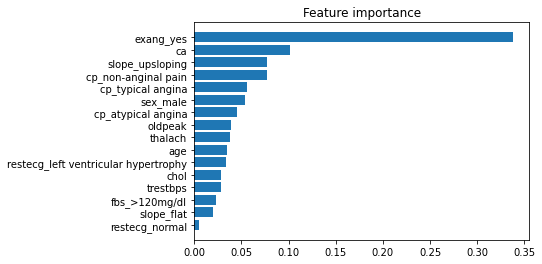

In [101]:
plt.barh(feature_df['feature'],feature_df['importance'])
plt.title('Feature importance')

The predictors that have bigger impact when predicting heart disease are exercise induced angina, number of major vessels colored by flourosopy and the slope of the peak exercise ST segment

In [74]:
# Since feature importance calculated from gini impurity can be misleading sometimes so also used permutation importance.
from sklearn.inspection import permutation_importance

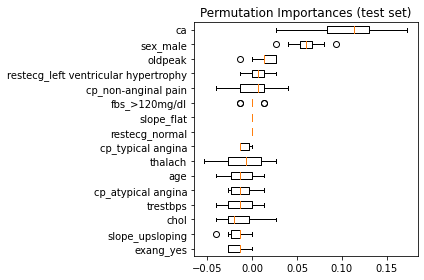

In [94]:
result = permutation_importance(gs.best_estimator_, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

The most important predictors based on the test data are number of major vessels colored by flourosopy, sex and slope